# Word frequency analysis of Adam Smith's The Wealth of Nations

In [1]:
import re
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
%matplotlib inline

In [2]:
# http://www.feedbooks.com/book/210/an-inquiry-into-the-nature-and-causes-of-the-wealth-of-nations
wealthOfNations = open('wealthOfNations.txt', 'r')

In [3]:
# source: http://www.lextek.com/manuals/onix/stopwords1.html
stopWords = ['a', 'about', 'above', 'across', 'after', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'an', 'and', 'another', 'any', 'anybody', 'anyone', 'anything', 'anywhere', 'are', 'area', 'areas', 'around', 'as', 'ask', 'asked', 'asking', 'asks', 'at', 'away', 'b', 'back', 'backed', 'backing', 'backs', 'be', 'became', 'because', 'become', 'becomes', 'been', 'before', 'began', 'behind', 'being', 'beings', 'best', 'better', 'between', 'big', 'both', 'but', 'by', 'c', 'came', 'can', 'cannot', 'case', 'cases', 'certain', 'certainly', 'clear', 'clearly', 'come', 'could', 'd', 'did', 'differ', 'different', 'differently', 'do', 'does', 'done', 'down', 'down', 'downed', 'downing', 'downs', 'during', 'e', 'each', 'early', 'either', 'end', 'ended', 'ending', 'ends', 'enough', 'even', 'evenly', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'f', 'face', 'faces', 'fact', 'facts', 'far', 'felt', 'few', 'find', 'finds', 'first', 'for', 'four', 'from', 'full', 'fully', 'further', 'furthered', 'furthering', 'furthers', 'g', 'gave', 'general', 'generally', 'get', 'gets', 'give', 'given', 'gives', 'go', 'going', 'good', 'goods', 'got', 'great', 'greater', 'greatest', 'group', 'grouped', 'grouping', 'groups', 'h', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'herself', 'high', 'high', 'high', 'higher', 'highest', 'him', 'himself', 'his', 'how', 'however', 'i', 'if', 'important', 'in', 'interest', 'interested', 'interesting', 'interests', 'into', 'is', 'it', 'its', 'itself', 'j', 'just', 'k', 'keep', 'keeps', 'kind', 'knew', 'know', 'known', 'knows', 'l', 'large', 'largely', 'last', 'later', 'latest', 'least', 'less', 'let', 'lets', 'like', 'likely', 'long', 'longer', 'longest', 'm', 'made', 'make', 'making', 'man', 'many', 'may', 'me', 'member', 'members', 'men', 'might', 'more', 'most', 'mostly', 'mr', 'mrs', 'much', 'must', 'my', 'myself', 'n', 'necessary', 'need', 'needed', 'needing', 'needs', 'never', 'new', 'new', 'newer', 'newest', 'next', 'no', 'nobody', 'non', 'noone', 'not', 'nothing', 'now', 'nowhere', 'number', 'numbers', 'o', 'of', 'off', 'often', 'old', 'older', 'oldest', 'on', 'once', 'one', 'only', 'open', 'opened', 'opening', 'opens', 'or', 'order', 'ordered', 'ordering', 'orders', 'other', 'others', 'our', 'out', 'over', 'p', 'part', 'parted', 'parting', 'parts', 'per', 'perhaps', 'place', 'places', 'point', 'pointed', 'pointing', 'points', 'possible', 'present', 'presented', 'presenting', 'presents', 'problem', 'problems', 'put', 'puts', 'q', 'quite', 'r', 'rather', 'really', 'right', 'right', 'room', 'rooms', 's', 'said', 'same', 'saw', 'say', 'says', 'second', 'seconds', 'see', 'seem', 'seemed', 'seeming', 'seems', 'sees', 'several', 'shall', 'she', 'should', 'show', 'showed', 'showing', 'shows', 'side', 'sides', 'since', 'small', 'smaller', 'smallest', 'so', 'some', 'somebody', 'someone', 'something', 'somewhere', 'state', 'states', 'still', 'still', 'such', 'sure', 't', 'take', 'taken', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'therefore', 'these', 'they', 'thing', 'things', 'think', 'thinks', 'this', 'those', 'though', 'thought', 'thoughts', 'three', 'through', 'thus', 'to', 'today', 'together', 'too', 'took', 'toward', 'turn', 'turned', 'turning', 'turns', 'two', 'u', 'under', 'until', 'up', 'upon', 'us', 'use', 'used', 'uses', 'v', 'very', 'w', 'want', 'wanted', 'wanting', 'wants', 'was', 'way', 'ways', 'we', 'well', 'wells', 'went', 'were', 'what', 'when', 'where', 'whether', 'which', 'while', 'who', 'whole', 'whose', 'why', 'will', 'with', 'within', 'without', 'work', 'worked', 'working', 'works', 'would', 'x', 'y', 'year', 'years', 'yet', 'you', 'young', 'younger', 'youngest', 'your', 'yours', 'z']
dig = ['0','1','2','3','4','5','6','7','8','9']

In [4]:
wordCatalog = dict()
for l in wealthOfNations:
    line = re.sub('[.,;:"*?!$()]', '', l)
    wordsInLine = line.split()
    for word in wordsInLine:
        w = word.lower()
        # 
        if (w.find('-') == -1) & (w[0] not in dig) & (w.find('wwwfeedbookscom') == -1):
            if w not in stopWords:
                wordCatalog[w] = wordCatalog.get(w, 0) + 1

In [5]:
tmpList = list()
for (key, val) in wordCatalog.items():
    tmpList.append( (val, key) )
tmpList.sort(reverse=True) # descending order by frequency

In [6]:
cntr = 0
freqList = list()

for (freq, word) in tmpList:
    freqList.append(freq)
    # just to print the most common words:
    if cntr < 20:
        print word, ":" , freq
    cntr += 1

price : 1249
country : 1247
labour : 985
trade : 971
produce : 935
value : 794
quantity : 791
people : 776
money : 737
nations : 721
own : 687
revenue : 681
silver : 678
land : 654
wealth : 653
capital : 643
nature : 631
time : 607
countries : 582
stock : 577


#### Demonstration of Zipf's Law:

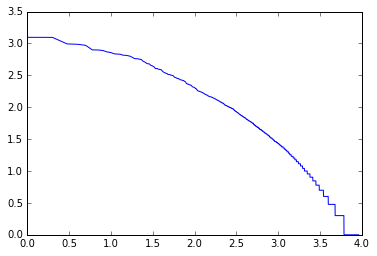

In [7]:
ranks = range(1,len(freqList)+1)
logRanks = np.log10(ranks)
logFreq = np.log10(freqList)
plt.plot(logRanks, logFreq)

####  Slope of the power law:

In [8]:
print linregress(logRanks, logFreq)

LinregressResult(slope=-1.361818143278213, intercept=5.3887442256353983, rvalue=-0.9738385326557748, pvalue=0.0, stderr=0.003324612066496091)


#### Word cloud generated with [Wordle](http://www.wordle.net/) from the elements of the 'wordCatalog' dictionary:
- additional filtering for English stopwords
- maximum number of words: 300
- layout: horizontal, alphabetical
<img src="wordle.png">